In [41]:
%matplotlib inline

In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
def get_frequencies(total, types, max_per_type):
    assert total <= types * max_per_type
    # Made explicit to make the math clear
    defect_frequences = np.zeros(types, dtype=int)
    for i in range(total):
        this_selection = np.random.choice(types)
        while defect_frequences[this_selection] >= max_per_type:
            this_selection = np.random.choice(types)
        defect_frequences[this_selection] += 1
    return defect_frequences[0]

In [48]:
max_total = 20
num_types = 4
max_per_type = 5

totals = np.arange(1, max_total + 1, dtype=int)
tries_count = 5000
results = np.empty((len(totals), tries_count))
for i, total_frequency in enumerate(totals):
    results[i] = np.fromiter((get_frequencies(total_frequency, num_types, max_per_type) for _ in range(tries_count)), dtype=int, count=tries_count)

In [53]:
values, counts = np.unique(results, return_counts=True)

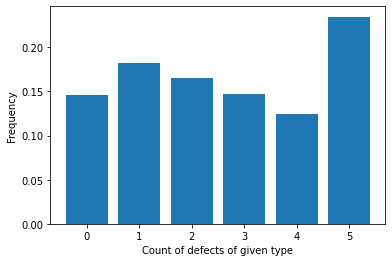

In [63]:
fig, ax = plt.subplots()
ax.bar(values, counts/counts.sum())
ax.set_xlabel("Count of defects of given type")
ax.set_ylabel("Frequency")
fig.savefig("defect_frequences.png", dpi=300, bbox_inches="tight")